Boston Housing Price Prediction Regression model:

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable

Here is the code to load the data:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [1]:
# Importing the Boston Housing price dataset

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
# Importing packages required for building the linear regression model

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression
import scikitplot as skl
sns.set()
import statsmodels

In [3]:
# Function to calculate Adjusted R2 score to calculate the model acccuracy after the model is built

def adj_r2(x,y):
    r2 = l_regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [4]:
# Exploring the instance to which the data was loaded

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# Lets first explore the description of the dataset

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Observations:

The data is in the form of dictionaries with the keys being data, target, feature_names and 'DESCR'. 'data' is holding the features variables, 'target' is holding the response variable, feature_names is holding the headings of the feature variables and 'DESCR' contains the description of the dataset.

The goal of the project is to predict the housing price(MEDV) given the data in the different feature columns.
    

In [6]:
# data of feature columns

boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# feature column names

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# Target/response column data

#print(dir(boston.target))
#boston.target.shape
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# Convert target/response data into pandas series object

bos_ser = pd.Series(boston.target)
bos_ser

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [10]:
# Create dataframe from feature variables data

df = pd.DataFrame(data = boston.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
# Creating series for feature column names

bos_col = pd.Series(boston.feature_names)
bos_col

0        CRIM
1          ZN
2       INDUS
3        CHAS
4         NOX
5          RM
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
dtype: object

In [12]:
# Including target/feature column to column name series

#print(dir(bos_col))

bos_colm = bos_col.append(pd.Series(['MEDV']),ignore_index = True)

In [13]:
# Join feature columns and response/target column into a single dataframe

bos = pd.concat([df,bos_ser], axis = 1,ignore_index = True )
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
# Dataframe with response/target column and column names

bos.rename(bos_colm, axis = 1, inplace = True)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
# Creating a dataframe with the boston dataset and with the column headers
# bos = pd.DataFrame(data = boston.data, columns = bos_col)

In [15]:
# Statistical summary of the data

bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:
    
- No null values for any of the columns
- Possible outliers in CRIM, ZN and B feature columns

In [16]:
# Info on missing values and data type of columns

bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
# Examining the first 5 rows

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Number of rows and columns in the dataset

bos.shape

(506, 14)

In [19]:
# Checking for null values count by column in the dataset (This steps is just for practice as we already know that there is no null values for any of the columns in this dataset)

#print(dir(bos.isna()))
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
# Split the dataset into feature (x) and response (y) data

y = bos['MEDV']
x = bos.drop(columns = ['MEDV'])

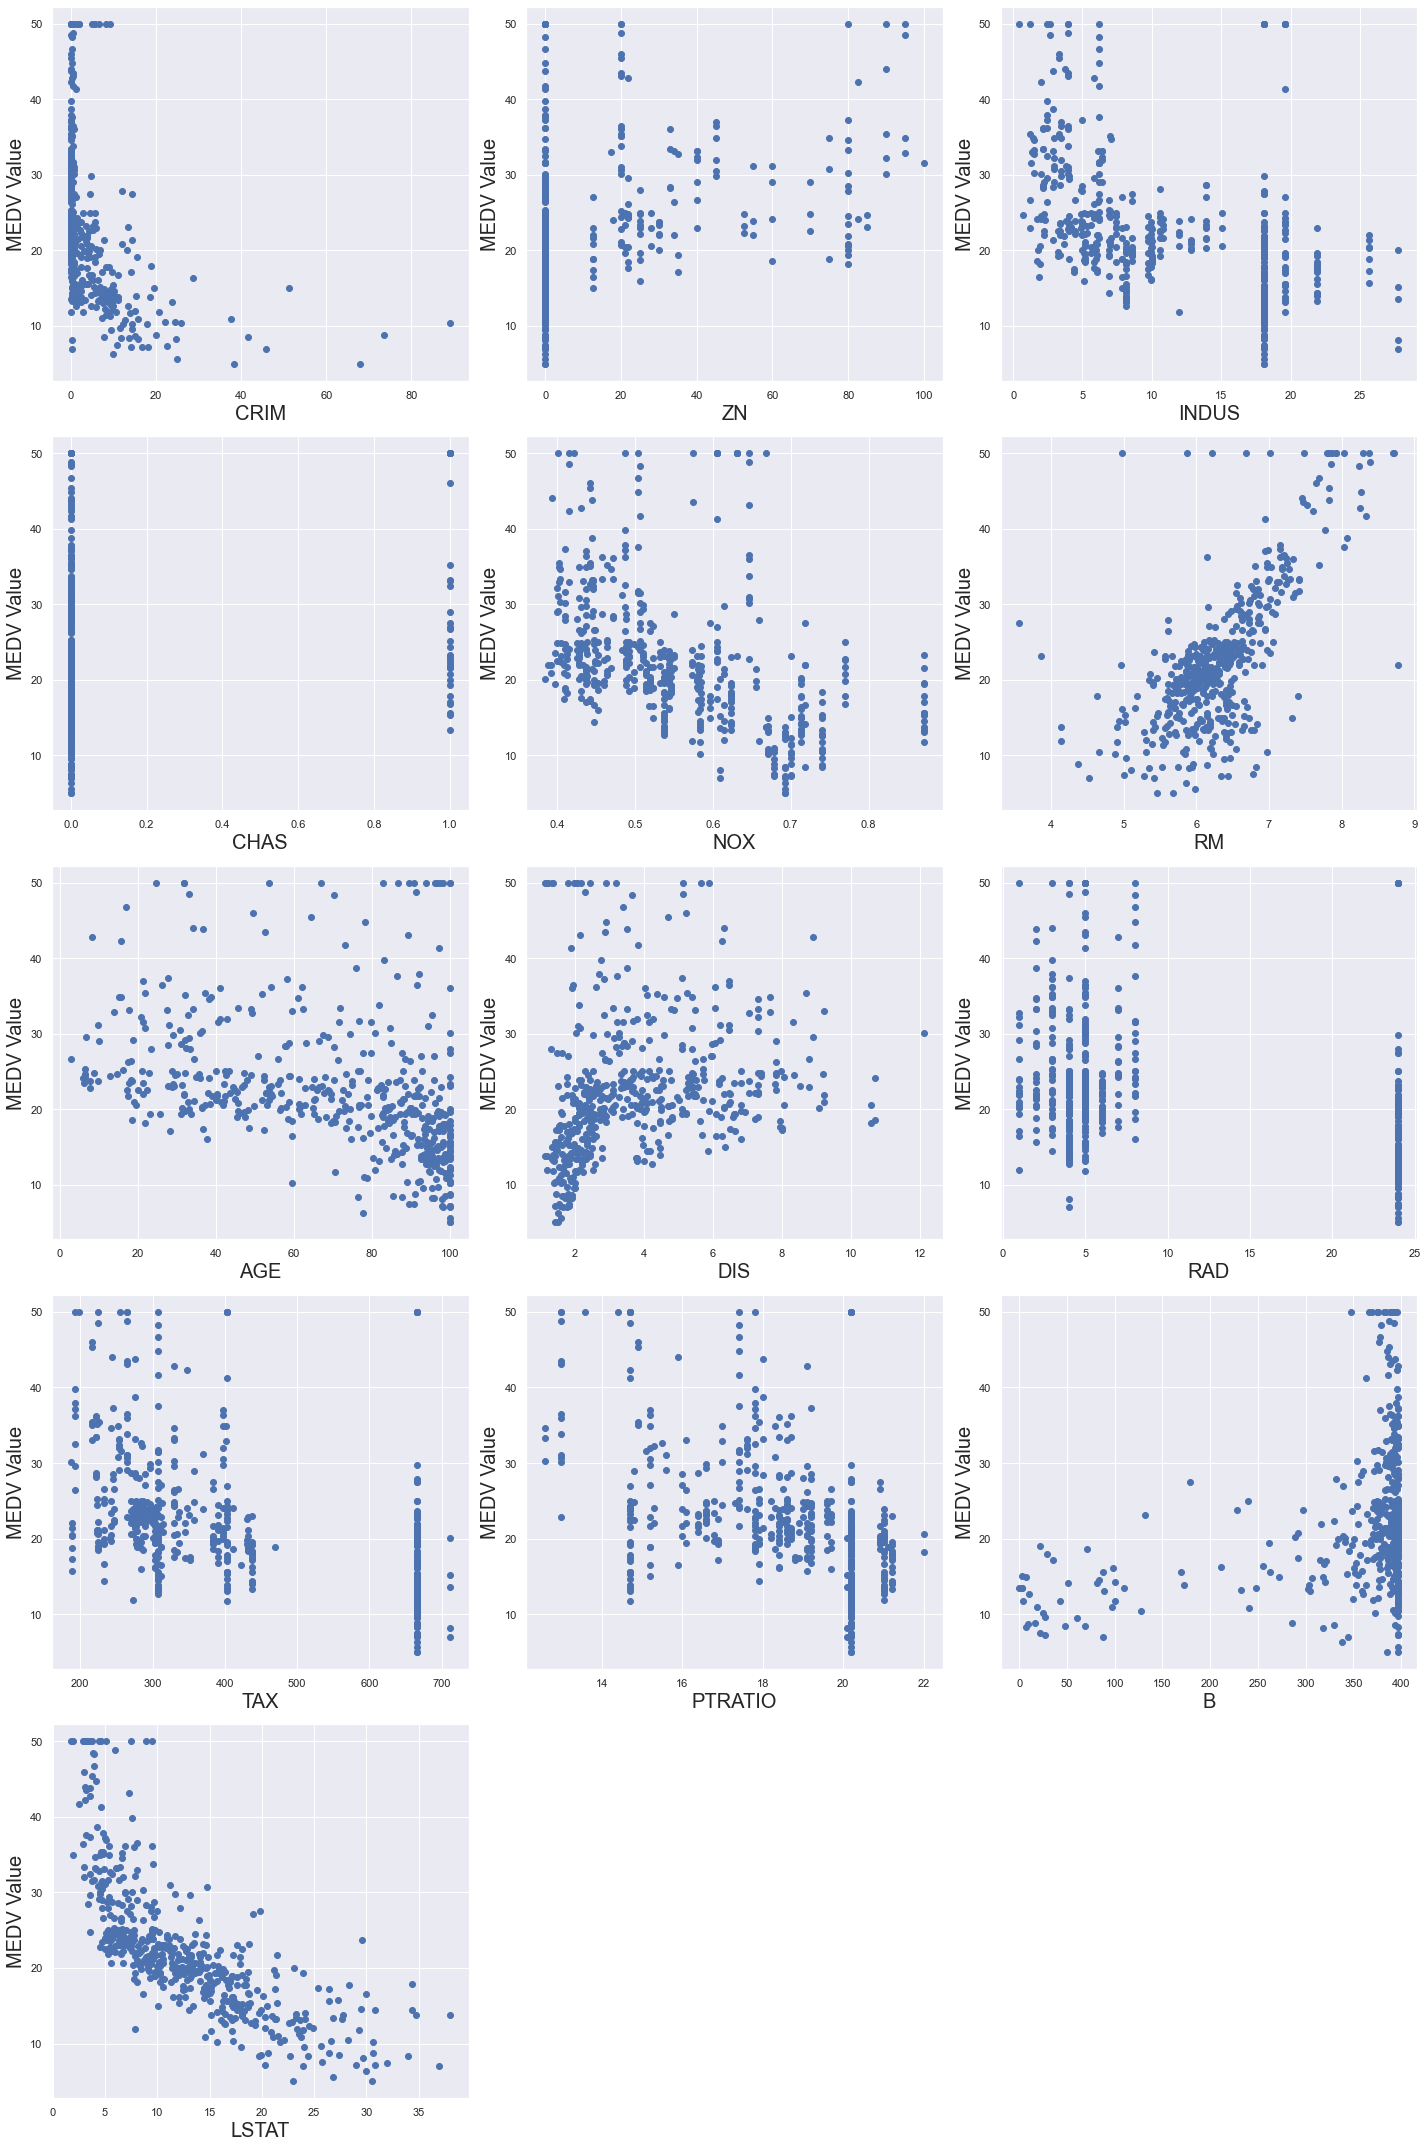

In [21]:
# Visualize the relationship between feature variables and the response variable

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('MEDV Value', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

Observations:

- Only the RM feature column seems to be having a strong positive correlation with the response variable 'MEDV'
- LSTAT seems to be having a negative correlation with the response variable
- DIS feature seems to be having a weak (Not prominant) positive correlation with the response variable
- CRIM, AGE and NOX seem to be having a weak negative correlation with the response variable

From the initial observation, it looks like 'Linear Regression' is not an ideal apporach for this problem.

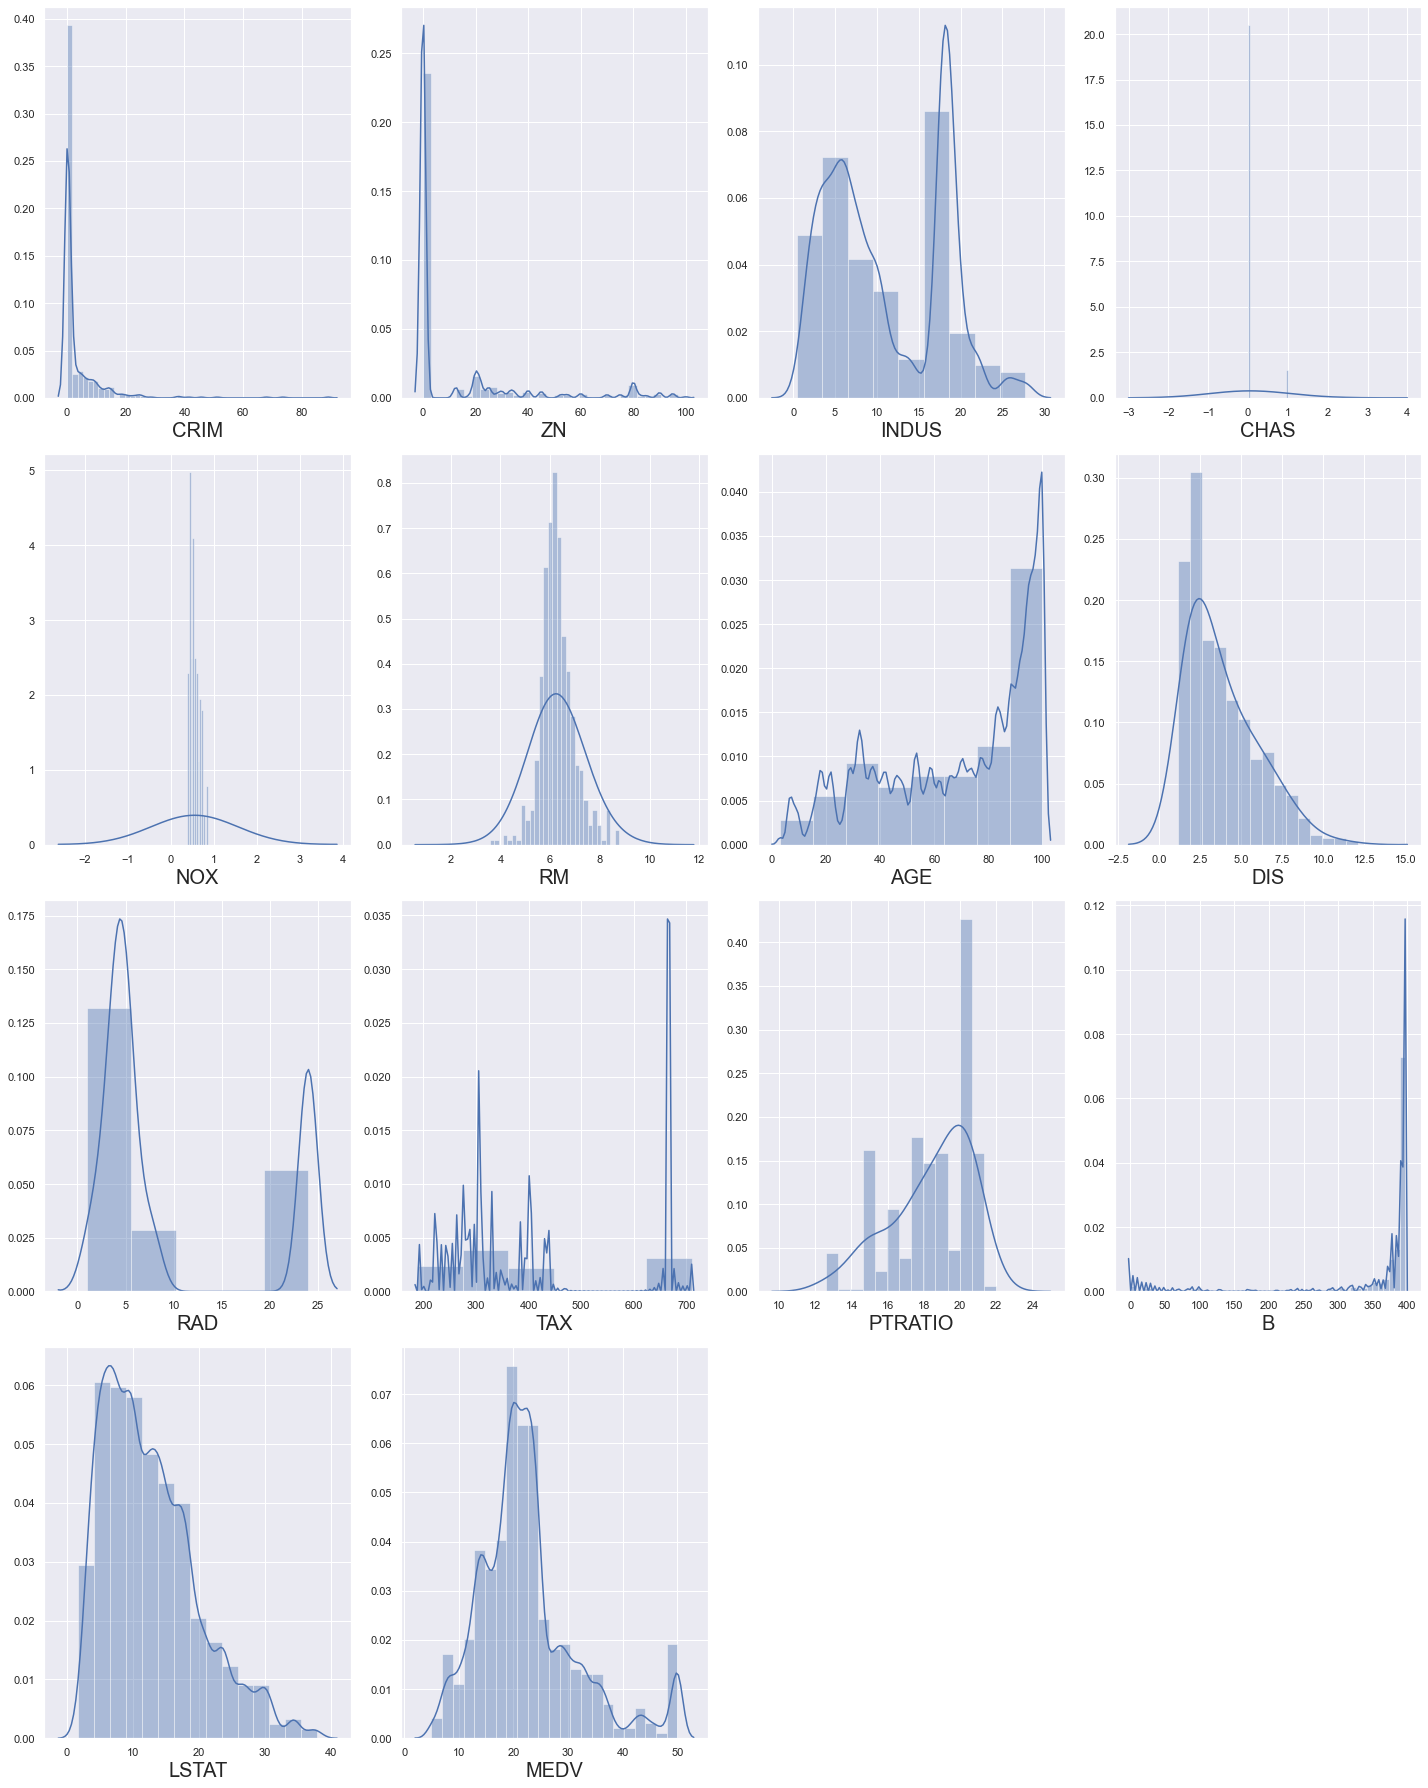

In [23]:
# Data Distribution of every feature column 

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in bos:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column],kde_kws={'bw':1})
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

Observation:
    
From the above data distribution, we can see that the data is skewed for some of the columns. Lets use Box plots to identify outliers in the dataset.

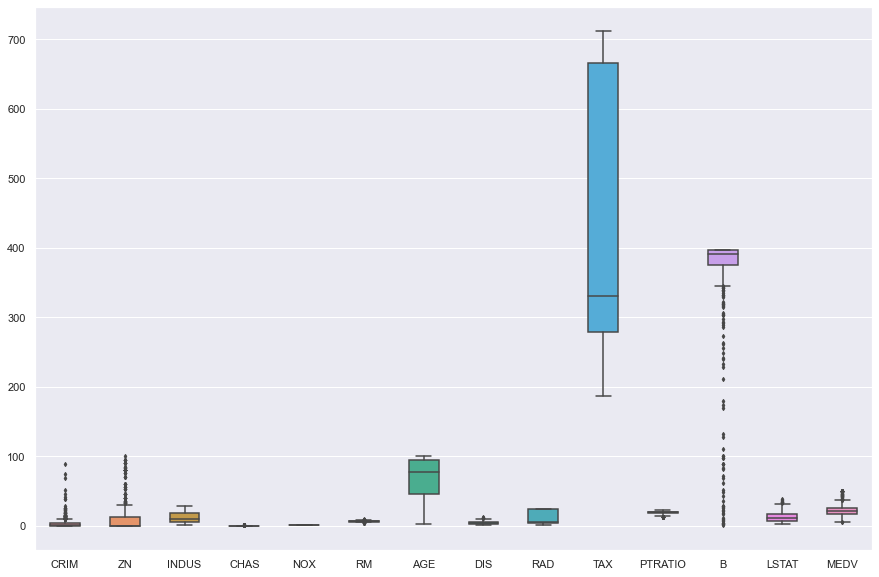

In [24]:
# Box plots to identify outliers in the dataset

fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = bos, width = 0.5, ax = ax , fliersize = 3)

In [25]:
# Use standard scaler for scaling the data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
x_scaled_df = pd.DataFrame(x_scaled)

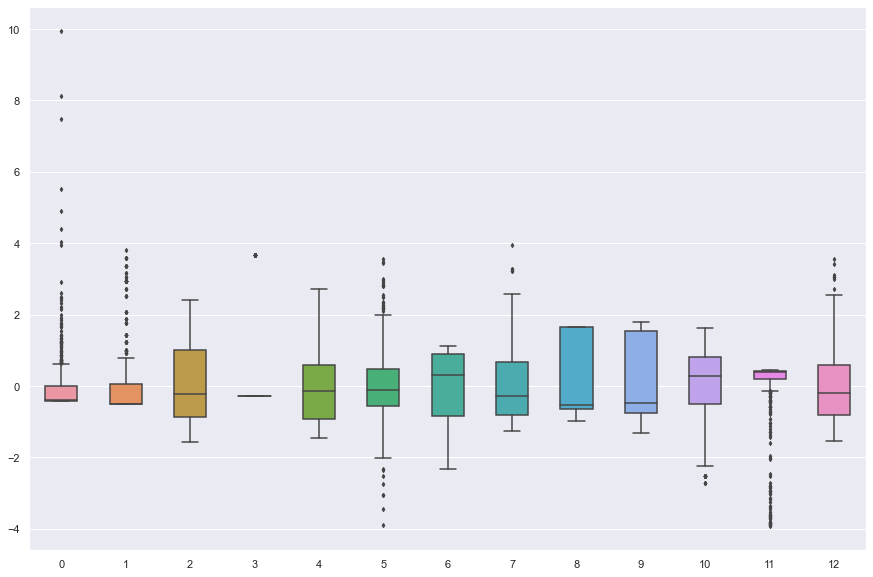

In [27]:
# Plot the box plot to understand the outliers better

fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = x_scaled, width = 0.5, ax = ax , fliersize = 3)

Observations:

- From a first look of the box plots, it appears that there are HIGH level of outliers in the CRIM, ZN and B feature columns and a few  outliers in CHAS, RM, DIS, PTRATIO and LSTAT columns

- However, if you look at most of the columns, there is a linear progression in the values and very few of them are actually outliers. For eg: if you take CRIM field, it is natural that there are few high values in the dataset because it is expected that there will only be very few places with such high crime rate. The high values are also somewhat having a linear progression and does not seem to be an error. Looking at these senarios, I will not be removing any data from the dataset. Possible solution is to use another algorithm other than the linear algorithm for getter a better fit to the dataset. However, I am proceeding below with the linear regression algorithm to see the how well we are able to fit a linear solution to the dataset.

- You can also check for data imbalance in the dataset using strip plots.

- Before taking any steps, we wil first check the accuracy of the model and then proceed with the above steps to check for improvements.

In [28]:
# Splitting the dataset into training and test data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state= 355)

In [29]:
#x_train.shape
x_test.shape

(127, 13)

In [30]:
# x_train - training feature columns dataset
# x_test - validation feature column dataset
# y_train - Training response column dataset
# y_test - Validation response column dataset

In [31]:
# Creating the linear regression model by fitting to the training data

l_regression = LinearRegression()

l_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
l_regression.score(x_train,y_train)

0.730647531347494

In [33]:
adj_r2(x_train,y_train)

0.7210541557516514

In [34]:
# Get the accuracy for the test dataset

l_regression.score(x_test,y_test)

0.7519030329262334

In [35]:
adj_r2(x_test,y_test)

0.7233609039708444

In [117]:
# Getting the feature co-efficients for the model

l_regression.coef_

array([-0.88712272,  1.175452  , -0.11610477,  0.9549459 , -1.98781429,
        3.1067488 , -0.39245347, -3.18778152,  2.28873011, -1.82529057,
       -1.84545771,  0.82059585, -2.89878976])

Observations:

The accuracy on the test data shows as 75 for R2 and 72 for adjusted R2 approximately. We will now try to perform additional data processing steps to improve the accuracy of the model.    
    

Approach:

- Check Strip plot to check for data imbalance in the dataset and take steps to address any data imbalance - May make more sense for categorical/discrete outcomes, hence we will not use it for our problem
- Use pearson correlation heatmap for the columns with high correlation to understand which columns are correlated
- Handle multicollinearity/correlated columns
- Use regularization techniques if required - Try usiing the Lasso, Ridge and ElasticNet to address 
- Use hyperparameter tuning (Cross Validation) to improve accuracy if required

Performing the following steps for practice towards the end of the notebook:

- Remove some Outliers using box plot results and then check the distribution of the data and compute accuracy using the learning algorithms
- Check Strip plot to check for data imbalance in the dataset


In [36]:
# Use the Variance Inflation factor metric to understand if there is multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns

In [37]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Notes:

After applying variation inflation factor, We are able to see that there is multicollinearity in the dataset. Specifically, we can see that the features RAD (7.8) and TAX (9) have a high value of VIF. We will need to handle these.

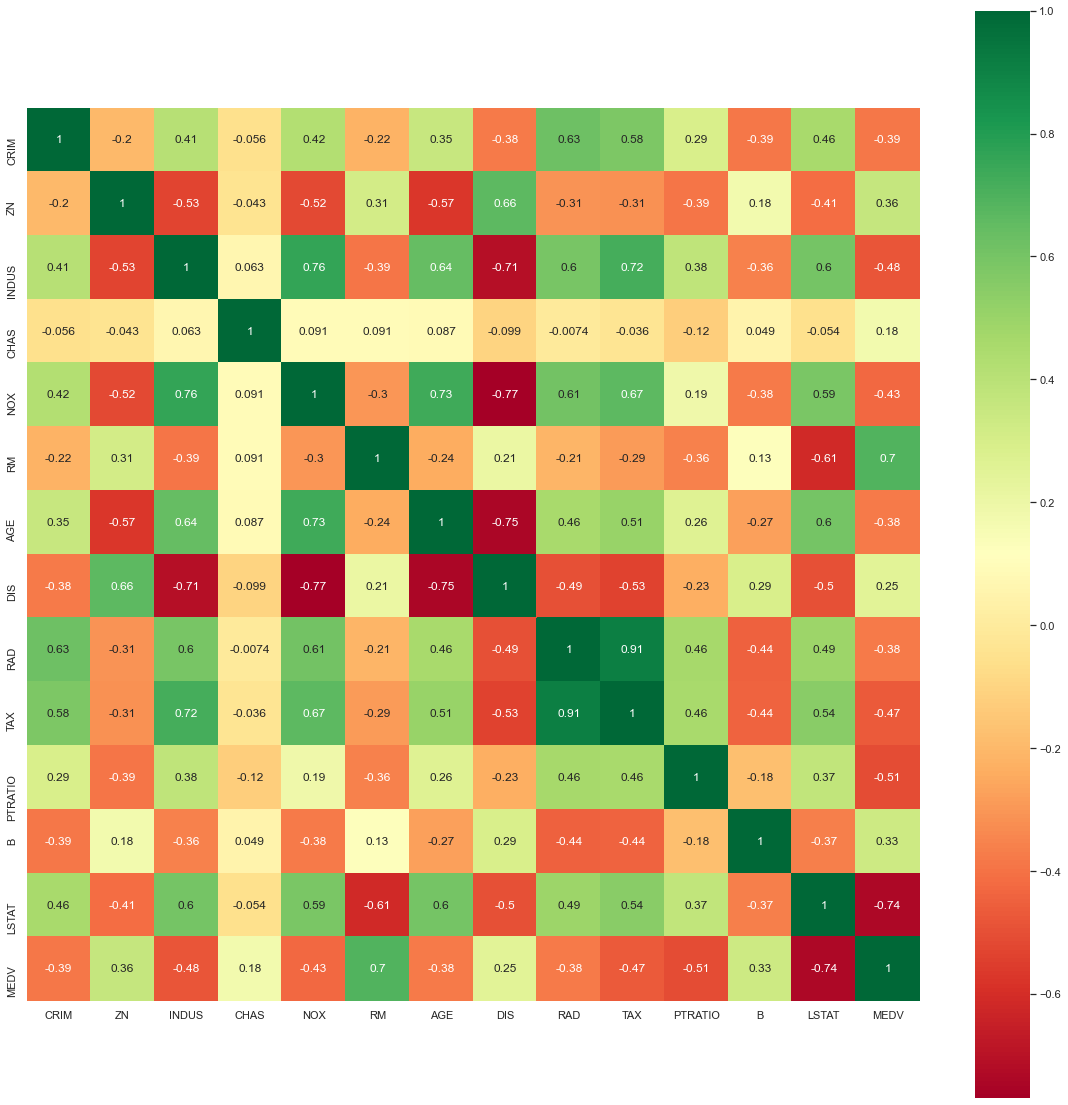

In [38]:
# Correlation Heat Map to check the relevance of RAD and TAX column to the output. 
# There seems to be strong correlation between RAD and TAX columns. 
# We will allow regularization to handle these for now and see the results and then decide if any further steps need to be taken
# Regularization will remove multicollinearity from the dataset to achieve good bias-variance balance.

plt.figure(figsize=(20,20))
sns.heatmap(bos.corr(), annot=True,cmap='RdYlGn',square=True)

In [133]:
# Regularization

# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv = LassoCV(alphas = None,cv =22, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [135]:
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [130]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [41]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
lasso_reg.score(x_test, y_test)

0.7518957038694828

In [43]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=20,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.0902238 , 6.78100917, 7.74798717, 7.23411054, 8.58075756,
       5.82294084, 5.04948777, 3.41410326, 2.89521705, 2.95779314,
       9.19979868, 3.94525571, 7.87874068, 3.80521059, 5.29225285,
       4.06905342, 9.68842857, 1.32098506, 1.64188348, 3.04956622,
       0.03297553, 9.23986228, 3.83959394, 3.14366187, 6.55403907,
       4.18211187, 7.82970791, 4.70972176, 9.55208956, 6.96635287,
       4.59113201, 3.66647473, 6.98379428, 4.61848451, 7.28186551,
       1.32739808, 7.24105225, 2.83507733, 2.09402821, 3.35910878,
       9.2776711 , 3.78157314, 6.62996095, 7.74503736, 3.09828348,
       1.59688114, 5.43611292, 3.57700097, 7.3129703 , 0.3805484 ]),
        cv=20, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [44]:
ridgecv.alpha_

0.032975526569535285

In [45]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.032975526569535285, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [46]:
ridge_model.score(x_test, y_test)

0.7518853405168312

In [48]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [49]:
elasticCV.alpha_

0.013238147250836645

In [50]:
elasticCV.l1_ratio

0.5

In [51]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836645, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [52]:
elasticnet_reg.score(x_test, y_test)

0.7503011494807525

In [118]:
# Getting the co-efficients for the feature columns

elasticnet_reg.coef_

array([-0.83041328,  1.10673716, -0.19196447,  0.95898799, -1.87358413,
        3.12341671, -0.37655293, -3.03454105,  2.0088699 , -1.57460578,
       -1.82007993,  0.80637738, -2.8867969 ])

In [ ]:
# There does not seem to be any overfitting issue with the dataset as the regularization
# techniques also returned similar accuracy for the model.

In [54]:
# Getting predicted values for x_test dataset

y_pred = elasticnet_reg.predict(x_test)

In [93]:
#y_pred1 = pd.Series(y_pred)
type(y_pred1)
#y_pred1
y_test.head(50)

488    15.2
128    18.0
191    30.5
53     23.4
388    10.2
242    22.2
29     21.0
486    19.1
257    50.0
476    16.7
94     20.6
165    25.0
174    22.6
316    17.8
425     8.3
197    30.3
247    20.5
323    18.5
185    29.6
391    23.2
28     18.4
62     22.2
303    33.1
314    23.8
258    36.0
96     21.4
41     26.6
189    34.9
351    24.1
269    20.7
248    24.5
324    25.0
454    14.9
286    20.1
460    16.4
250    24.4
273    35.2
9      18.9
65     23.5
160    27.0
309    20.3
149    15.4
10     15.0
451    15.2
246    24.3
331    17.1
278    29.1
446    14.9
63     25.0
459    20.0
Name: MEDV, dtype: float64

In [99]:
#Comparing results of Actual and Predicted Values:
    
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})

In [100]:
df.describe()

,Actual,Predicted
count,127.000000,127.000000
mean,22.782677,22.698631
std,9.492295,7.794833
min,5.000000,6.606277
25%,16.650000,17.954605
50%,21.000000,21.111019
75%,26.650000,27.330039
max,50.000000,46.002688


In [101]:
df

,Actual,Predicted
0,24.0,12.184543
1,NaN,19.099844
2,34.7,30.264938
3,33.4,23.800592
4,NaN,6.970053
...,...,...
486,19.1,NaN
488,15.2,NaN
493,21.8,NaN
500,16.8,NaN


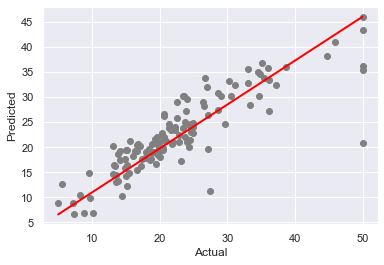

In [116]:
plt.scatter(y_test, y_pred1,  color='gray')
x_p = pd.DataFrame({'Act': [df.Actual.min(), df.Actual.max()]})
y_p = pd.DataFrame({'Pred': [df.Predicted.min(), df.Predicted.max()]})
plt.plot(x_p, y_p, color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Practice section:

In [28]:
# Strip plot to check for data imbalance. From the plot's below, there seems to be a good spread of the data 

#plt.figure(figsize = (20,25), facecolor = 'white')
#plotnumber = 1

#for column in x:
#    if plotnumber<=15:
#        ax = plt.subplot(5,3,plotnumber)
#        sns.stripplot(y,x[column])
        #plt.xlabel(column,fontsize = 20)
        #plt.ylabel('MEDV',fontsize = 20)
#    plotnumber += 1
#plt.tight_layout()

In [65]:
# Handling Outliers in the dataset

# 1 - CRIM feature Column - Below, we are looking at the response column(MEDV column) for the towns with 
# the highest crime rate

#print(dir(bos['CRIM']))
#filt = bos['CRIM'].sort_values().tail(50)
filt = (bos['CRIM'].isin(bos['CRIM'].sort_values().tail(25)))
filt
#print(dir(bos.loc[filt,['CRIM','MEDV']]))
bos.loc[filt,['CRIM','MEDV']].sort_values(by=['CRIM'],ascending=False)

,CRIM,MEDV
380,88.9762,10.4
418,73.5341,8.8
405,67.9208,5.0
410,51.1358,15.0
414,45.7461,7.0
404,41.5292,8.5
398,38.3518,5.0
427,37.6619,10.9
413,28.6558,16.3
417,25.9406,10.4


In [27]:
# Understanding the Response variable

#print(dir(bos['MEDV']))

bos['MEDV'].describe()
#bos['MEDV'].quantile(q=0.25)
#bos['MEDV'].sort_values().head(25)

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Observation:
    
The observation for the CRIM column is that the top 2 percentile of the values are clearly outliers and these 2 percentile values do not seem to significantly provide any new data pattern with respect to the target column. Hence we can safely remove the top 2 percentile of the values from the CRIM feature column

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64
0.0
505     0.0
439     0.0
440     0.0
441     0.0
442     0.0
       ... 
130     0.0
132     0.0
6      12.5
7      12.5
8      12.5
Name: ZN, Length: 375, dtype: float64


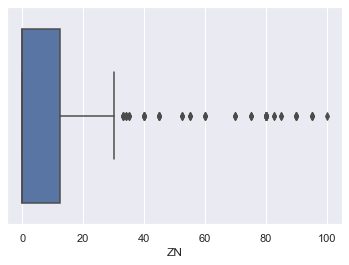

In [45]:
# 2 - ZN feature column outliers - We will remove the top 5 percentile of the values from the ZN feature column given the below observation

sns.boxplot(x['ZN'])
print(bos['ZN'].describe())
print(bos['ZN'].quantile(q=0.73))
print(bos['ZN'].sort_values().head(375))

,ZN,MEDV
57,100.0,31.6
204,95.0,50.0
199,95.0,34.9
203,95.0,48.5
200,95.0,32.9
353,90.0,30.1
284,90.0,32.2
283,90.0,50.0
256,90.0,44.0
55,90.0,35.4


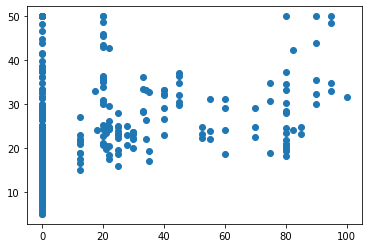

In [88]:
plt.scatter(x['ZN'],y)

filt_zn = (bos['ZN'].isin(bos['ZN'].sort_values().tail(25)))
bos.loc[filt_zn,['ZN','MEDV']].sort_values(by=['ZN'],ascending=False)

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64
8.0661
256    7.454
268    7.470
161    7.489
261    7.520
202    7.610
282    7.645
228    7.686
273    7.691
180    7.765
162    7.802
98     7.820
280    7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64


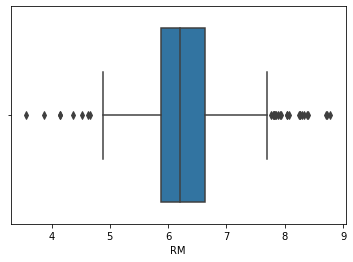

In [102]:
# 3 - RM feature column outliers - We will NOT remove any values for the RM feature columns as there seems
# increase in the values even in the outliers

sns.boxplot(x['RM'])
print(bos['RM'].describe())
print(bos['RM'].quantile(q=0.98))
print(bos['RM'].sort_values().tail(30))

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64
9.222769999999999
249     7.8265
248     7.8265
298     7.8278
299     7.8278
300     7.8278
245     7.9549
244     7.9549
63      7.9809
345     8.0136
346     8.0136
247     8.0555
246     8.0555
57      8.3248
348     8.3440
347     8.5353
55      8.6966
350     8.7921
349     8.7921
253     8.9067
252     8.9067
286     9.0892
56      9.1876
254     9.2203
255     9.2203
64      9.2229
354    10.5857
355    10.5857
352    10.7103
351    10.7103
353    12.1265
Name: DIS, dtype: float64


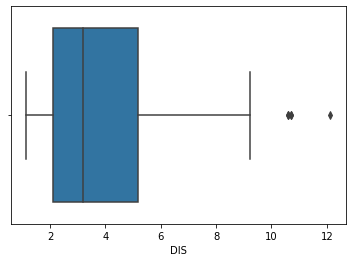

In [104]:
# 4 - DIS feature column outliers - We will remove top 1 percentile values for the DIS feature columns

sns.boxplot(x['DIS'])
print(bos['DIS'].describe())
print(bos['DIS'].quantile(q=0.99))
print(bos['DIS'].sort_values().tail(30))

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64
24.0
454    24.0
446    24.0
456    24.0
452    24.0
445    24.0
       ... 
406    24.0
407    24.0
408    24.0
410    24.0
371    24.0
Name: RAD, Length: 125, dtype: float64


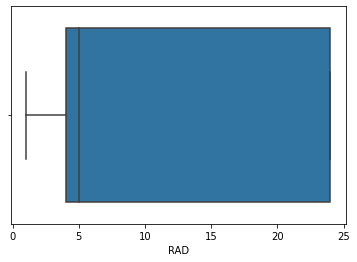

In [113]:
# 5 - RAD feature column outliers - We will NOT remove any values for the RAD feature columns for now 
# as there seems to be some logic towards giving the high value for the top 25 percentile part of the dataset
# and the box plot does not show any evident data as outliers

sns.boxplot(x['RAD'])
print(bos['RAD'].describe())
print(bos['RAD'].quantile(q=0.90))
print(bos['RAD'].sort_values().tail(125))

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64
666.0
442    666.0
443    666.0
441    666.0
440    666.0
457    666.0
       ...  
492    711.0
491    711.0
490    711.0
489    711.0
488    711.0
Name: TAX, Length: 125, dtype: float64


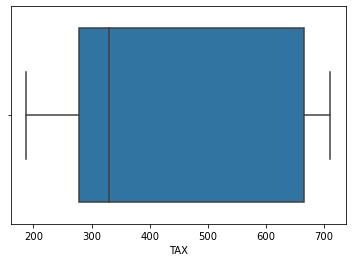

In [117]:
# 6 - TAX feature column outliers - We will NOT remove any values for the TAX feature columns as there seems
# increase in the values even in the outliers and
# as there seems to be some logic towards giving the high value for a part of the dataset
# and the box plot does not show any evident data as outliers

sns.boxplot(x['TAX'])
print(bos['TAX'].describe())
print(bos['TAX'].quantile(q=0.90))
print(bos['TAX'].sort_values().tail(125))

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64
21.0
372    20.2
371    20.2
370    20.2
377    20.2
368    20.2
       ... 
128    21.2
127    21.2
134    21.2
355    22.0
354    22.0
Name: PTRATIO, Length: 75, dtype: float64


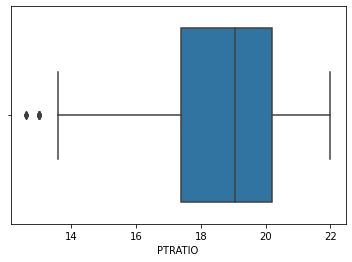

In [120]:
# 7 - PTRATIO feature column outliers - Linear increase in outliers - so will not remove any values for now

sns.boxplot(x['PTRATIO'])
print(bos['PTRATIO'].describe())
print(bos['PTRATIO'].quantile(q=0.95))
print(bos['PTRATIO'].sort_values().tail(75))

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64
19.095
450      0.32
423      2.52
410      2.60
457      3.50
424      3.65
454      6.68
425      7.68
437      9.32
456     10.48
418     16.45
427     18.82
416     21.57
466     22.01
426     24.65
415     27.25
436     27.49
412     28.79
411     35.05
445     43.06
419     48.45
455     50.92
429     60.72
438     68.95
102     70.80
431     81.33
430     83.45
155     88.01
414     88.27
156     88.63
428     96.73
432     97.95
433    100.19
434    100.63
435    109.85
417    127.36
367    131.42
146    169.27
145    172.91
409    179.36
413    210.97
167    227.61
32     232.60
165    240.16
444    240.52
34     248.31
460    255.23
153    261.95
134    262.76
458    272.21
384    285.83
Name: B, dtype: float64


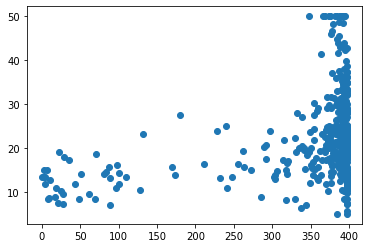

In [130]:
# 8 - B feature column outliers. Thought the box plot shows a lot out outliers in the data, the scatter plot does
# not show any particular linear relationship with the response variable. So we can consider the column to be
# completed removed from the model creation step or 
# update the bottom 2 percentile of the dataset with the mean value - This does not make sense since there can be towns 
# where the black population is really less

plt.scatter(x['B'],y)
#sns.boxplot(x['B'])
print(bos['B'].describe())
print(bos['B'].quantile(q=0.02))
print(bos['B'].sort_values().head(50))

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64
30.616999999999997
384    30.63
48     30.81
385    30.81
387    31.99
438    34.02
412    34.37
141    34.41
373    34.77
414    36.98
374    37.97
Name: LSTAT, dtype: float64


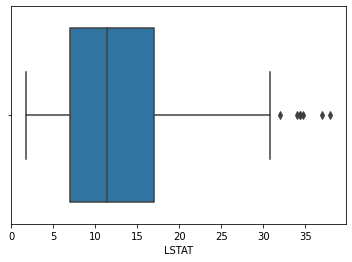

In [132]:
# 9 - LSTAT feature column outliers. Not removing the outliers since there seems to be a linear increase in the outliers

#plt.scatter(x['B'],y)
sns.boxplot(x['LSTAT'])
print(bos['LSTAT'].describe())
print(bos['LSTAT'].quantile(q=0.98))
print(bos['LSTAT'].sort_values().tail(10))

In [282]:
# Update dataframe to remove the outliers for all the columns as discussed earlier

# Removing the top 2 percentile of the values from the CRIM feature column
ql = bos['CRIM'].quantile(q=0.98)
bos_cleaned = bos[bos['CRIM']<ql]
# Removing the top 5 percentile of the values from the ZN feature column
ql = bos_cleaned['ZN'].quantile(q=0.95)
bos_cleaned = bos_cleaned[bos_cleaned['ZN']<ql]
# Removing top 1 percentile values for the DIS feature columns
ql = bos_cleaned['DIS'].quantile(q=0.99)
bos_cleaned = bos_cleaned[bos_cleaned['DIS']<ql]


In [285]:
bos_cleaned.describe()
bos_cleaned.shape

(461, 14)

In [286]:
# Removing B column from the dataset for model creation

#bos_new = bos_cleaned.drop(columns = ['B'])
bos_new = bos_cleaned

In [287]:
bos_new.describe()
bos_new.shape

(461, 14)

In [288]:
bos_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [289]:
#print(dir(bos_new))
bos_new.reset_index(inplace = True)

In [290]:
bos_new.drop(columns = 'index', inplace = True)

In [291]:
bos_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     461 non-null    float64
 1   ZN       461 non-null    float64
 2   INDUS    461 non-null    float64
 3   CHAS     461 non-null    float64
 4   NOX      461 non-null    float64
 5   RM       461 non-null    float64
 6   AGE      461 non-null    float64
 7   DIS      461 non-null    float64
 8   RAD      461 non-null    float64
 9   TAX      461 non-null    float64
 10  PTRATIO  461 non-null    float64
 11  B        461 non-null    float64
 12  LSTAT    461 non-null    float64
 13  MEDV     461 non-null    float64
dtypes: float64(14)
memory usage: 50.5 KB


In [292]:
bos_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,2.825167,6.732104,11.601757,0.073753,0.562667,6.256167,70.958785,3.550234,9.661605,410.121475,18.538178,357.643492,12.922516,22.203471
std,4.870156,14.744134,6.687759,0.261652,0.112967,0.681447,26.735724,1.796698,8.672697,168.614606,2.108744,89.200593,6.926396,8.712609
min,0.006320,0.000000,1.250000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.093780,0.000000,5.860000,0.000000,0.469000,5.885000,51.800000,2.100000,4.000000,281.000000,17.400000,375.210000,7.440000,17.000000
50%,0.298190,0.000000,9.900000,0.000000,0.538000,6.185000,79.900000,3.048000,5.000000,330.000000,19.100000,391.270000,11.970000,21.000000
75%,3.678220,0.000000,18.100000,0.000000,0.624000,6.563000,94.300000,4.566700,24.000000,666.000000,20.200000,396.210000,17.100000,24.700000
max,24.801700,75.000000,27.740000,1.000000,0.871000,8.780000,100.000000,8.792100,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


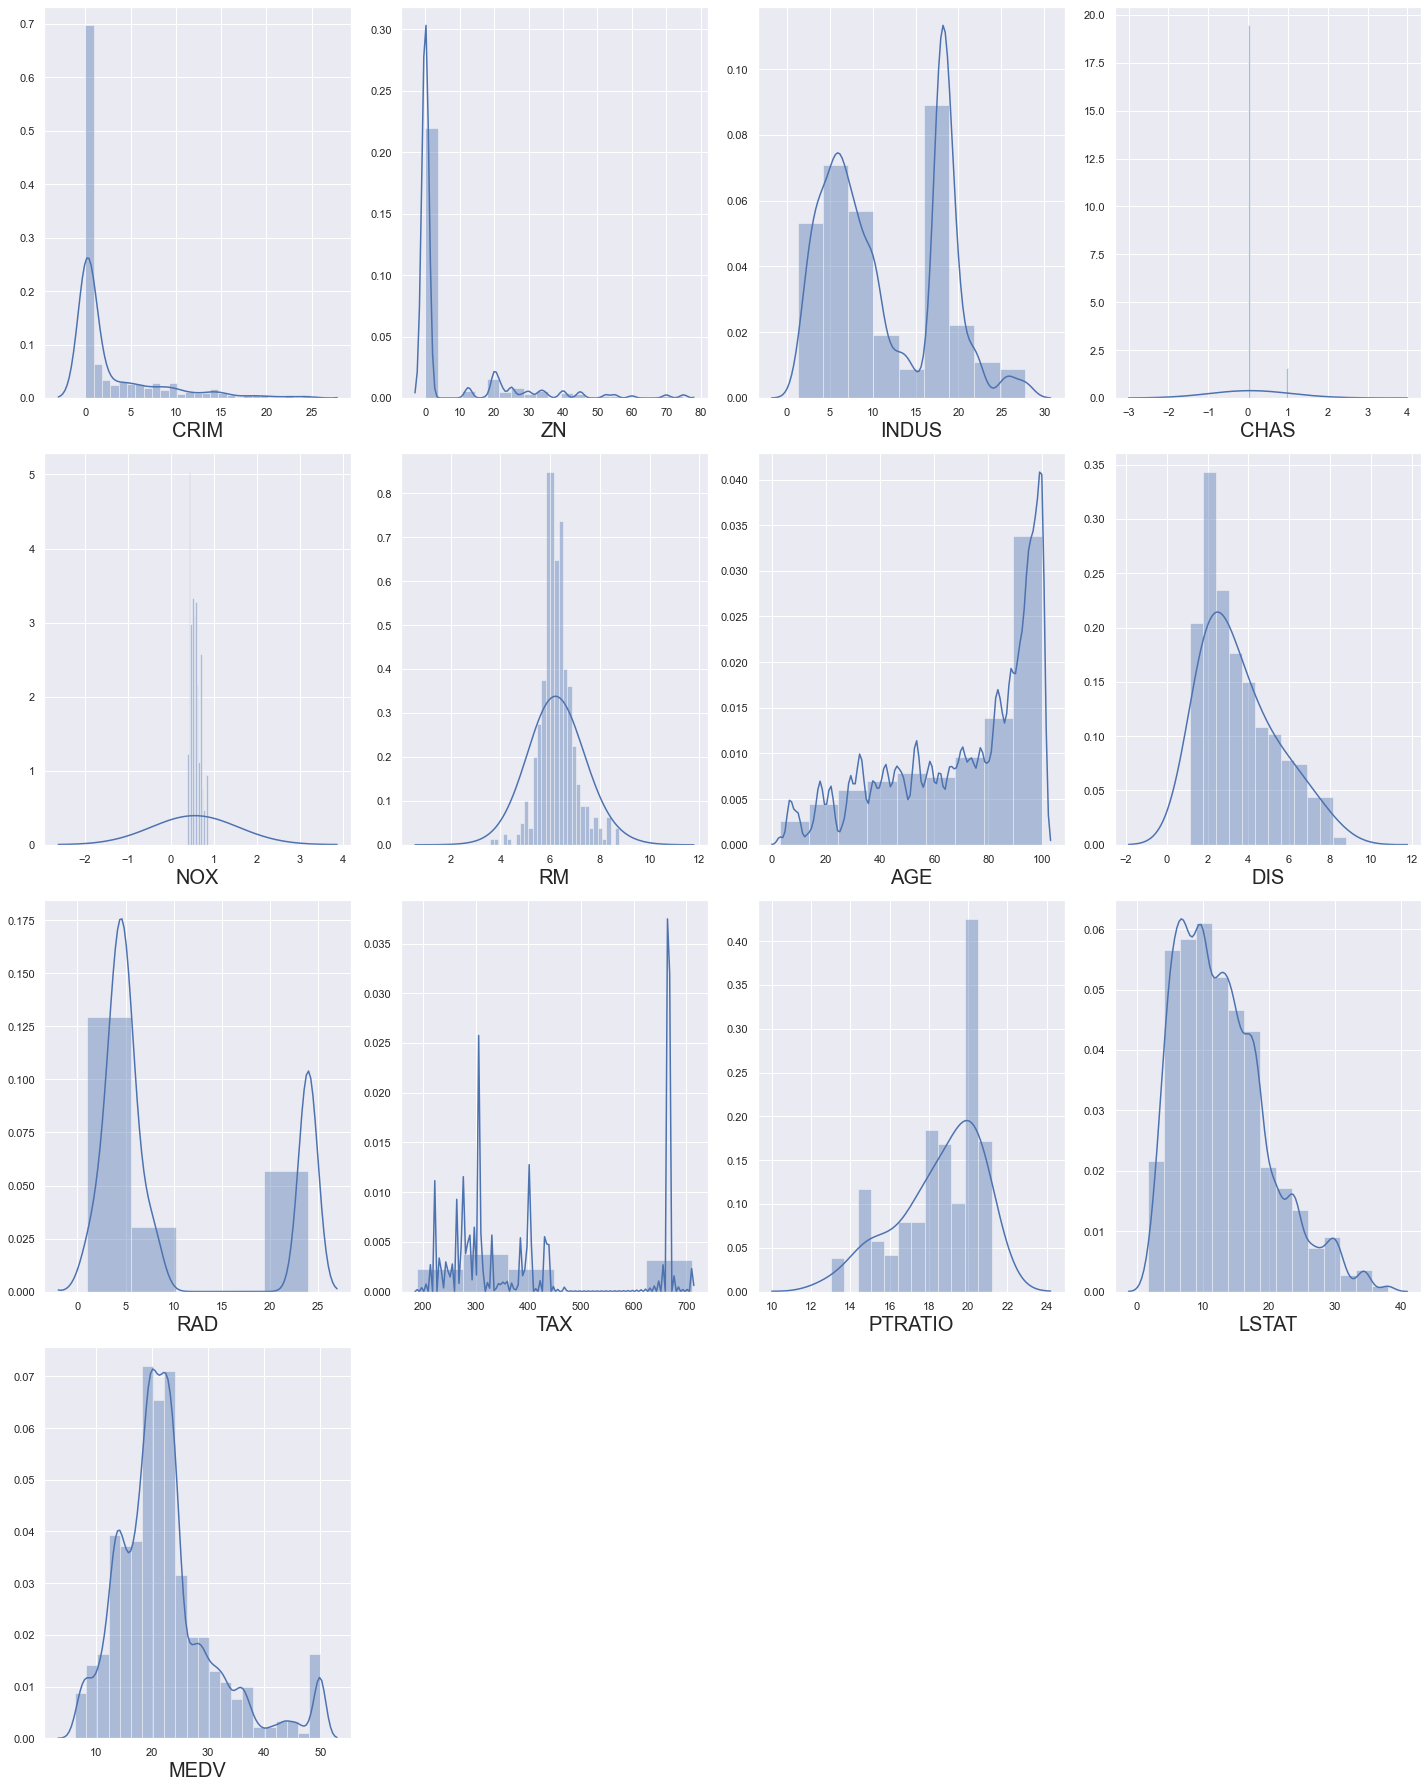

In [236]:
# Data Distribution of every feature column after outlier removal
# Including bandwidth paramter to plot due to error described here: https://github.com/mwaskom/seaborn/issues/1990

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in bos_new:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos_new[column],kde_kws={'bw':1})
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [293]:
# Creating the new model by fitting to new training data set

y_new = bos_new['MEDV']
x_new = bos_new.drop(columns = ['MEDV'])

# Use standard scaler for scaling the data

scaler = StandardScaler()
x_scaledw = scaler.fit_transform(x_new)

# Splitting the dataset into training and test data

x_trainw,x_testw,y_trainw,y_testw = train_test_split(x_scaledw,y_new,test_size = 0.25,random_state= 355)

In [294]:
l_regression = LinearRegression()

l_regression.fit(x_trainw,y_trainw)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
l_regression.score(x_testw,y_testw)

0.7509343827609649

In [296]:
adj_r2(x_testw,y_testw)

0.7191907256618721

In [42]:
#

In [298]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0016752544695105497

In [299]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_trainw, y_trainw)

Lasso(alpha=0.0016752544695105497, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [300]:
lasso_reg.score(x_testw, y_testw)

0.7512192764490768

In [301]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_trainw, y_trainw)

RidgeCV(alphas=array([2.871079  , 4.53187171, 5.34009452, 9.15011796, 0.07150089,
       8.85090166, 2.21107348, 1.33057772, 4.39675758, 8.69772002,
       4.10451967, 1.04530687, 1.96436772, 4.68352155, 9.3398839 ,
       6.46792986, 2.63624609, 6.6137379 , 8.67021319, 6.65960811,
       4.11616003, 6.38244971, 3.46416599, 2.37082743, 3.86285618,
       8.83708501, 8.70481304, 9.70336541, 4.61808383, 0.977332  ,
       5.65116409, 8.49468565, 9.21500429, 3.34272781, 2.4902853 ,
       5.96556946, 1.15963151, 2.69945448, 7.02631584, 3.38043895,
       1.95526883, 6.383022  , 0.29787961, 4.93600786, 1.40801182,
       3.0261358 , 4.63136256, 7.96230042, 7.96097997, 3.52826791]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [302]:
ridgecv.alpha_

0.071500890502042

In [303]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_trainw, y_trainw)

Ridge(alpha=0.071500890502042, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [304]:
ridge_model.score(x_testw, y_testw)

0.7510149095110518

In [305]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_trainw, y_trainw)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [306]:
elasticCV.alpha_

0.025259247886707466

In [307]:
elasticCV.l1_ratio

0.5

In [308]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_trainw, y_trainw)

ElasticNet(alpha=0.025259247886707466, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [309]:
elasticnet_reg.score(x_testw, y_testw)

0.7561703032331145